Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [2]:
from glob import glob

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [4]:
print(os.listdir("/content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration"))

['Test', 'Train']


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

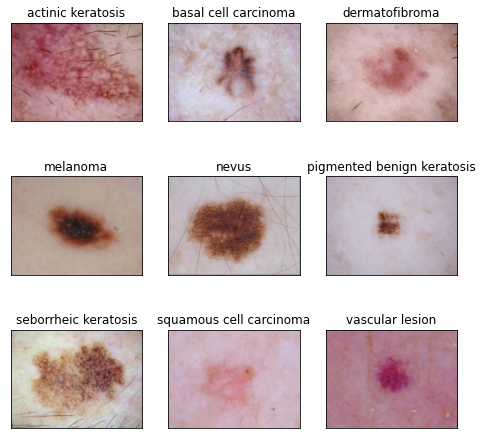

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

### your code goes here, you can use training or validation data to visualize
fig = plt.figure(figsize=(8,8))
for i in range(len(class_names)):
    ax = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
    re = class_names[i] + "/*.jpg"
    list1 = list(data_dir_train.glob(re))
    img = Image.open(list1[0])
    ax.set_title(class_names[i])
    plt.imshow(img)
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here

model = Sequential()

model.add(Rescaling(scale=1./255, offset=0.0, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(len(class_names)))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='sgd',
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 90, 90, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 90, 90, 32)        0

### Train the model

In [16]:
epochs = 20
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    epochs=epochs,
    shuffle=True
)

Epoch 1/20
56/56 [==============================] - 247s 819ms/step - loss: 1.9834 - accuracy: 0.4135 - val_loss: 2.1652 - val_accuracy: 0.1633
Epoch 2/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3018 - accuracy: 0.5391 - val_loss: 2.2334 - val_accuracy: 0.1521
Epoch 3/20
56/56 [==============================] - 3s 46ms/step - loss: 1.1381 - accuracy: 0.5926 - val_loss: 2.1327 - val_accuracy: 0.1633
Epoch 4/20
56/56 [==============================] - 3s 45ms/step - loss: 1.0215 - accuracy: 0.6440 - val_loss: 2.2205 - val_accuracy: 0.1544
Epoch 5/20
56/56 [==============================] - 3s 46ms/step - loss: 0.9240 - accuracy: 0.6624 - val_loss: 2.2229 - val_accuracy: 0.2349
Epoch 6/20
56/56 [==============================] - 3s 45ms/step - loss: 0.8016 - accuracy: 0.7104 - val_loss: 1.6687 - val_accuracy: 0.3669
Epoch 7/20
56/56 [==============================] - 3s 45ms/step - loss: 0.7170 - accuracy: 0.7388 - val_loss: 1.5632 - val_accuracy: 0.4295
Epoch 8/20

### Visualizing training results

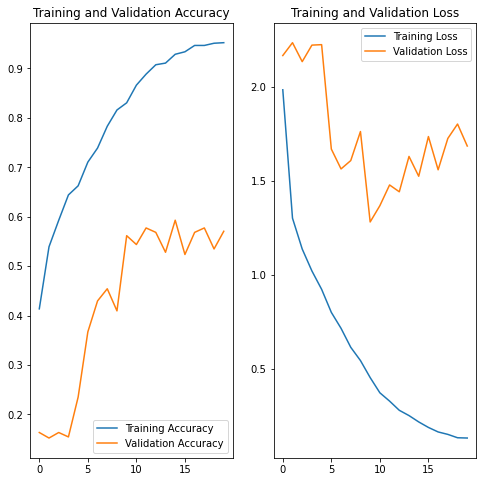

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved around 95% accuracy on the training set and 60% accuracy on the validation set.

The difference in accuracy between training and validation accuracy is noticeable — a sign of overfitting.

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

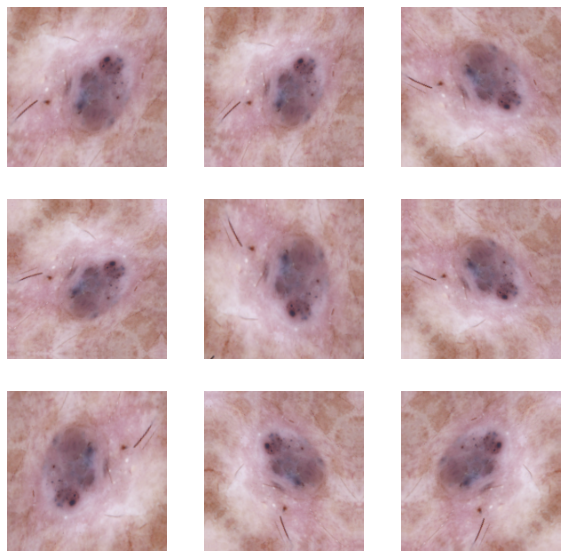

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0.0, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.15),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.15),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.15),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(class_names))
])

### Compiling the model

In [21]:
## Your code goes here
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='sgd',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)       

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    epochs=epochs,
    shuffle=True
)

Epoch 1/20
56/56 [==============================] - 4s 58ms/step - loss: 2.0488 - accuracy: 0.2143 - val_loss: 2.0645 - val_accuracy: 0.2349
Epoch 2/20
56/56 [==============================] - 3s 55ms/step - loss: 2.0116 - accuracy: 0.2411 - val_loss: 2.0202 - val_accuracy: 0.3199
Epoch 3/20
56/56 [==============================] - 3s 53ms/step - loss: 1.9813 - accuracy: 0.2573 - val_loss: 1.9844 - val_accuracy: 0.2975
Epoch 4/20
56/56 [==============================] - 3s 54ms/step - loss: 1.9613 - accuracy: 0.2829 - val_loss: 2.0357 - val_accuracy: 0.2349
Epoch 5/20
56/56 [==============================] - 3s 55ms/step - loss: 1.9356 - accuracy: 0.2963 - val_loss: 1.9075 - val_accuracy: 0.3468
Epoch 6/20
56/56 [==============================] - 3s 54ms/step - loss: 1.9075 - accuracy: 0.3086 - val_loss: 1.9172 - val_accuracy: 0.3266
Epoch 7/20
56/56 [==============================] - 3s 54ms/step - loss: 1.8653 - accuracy: 0.3209 - val_loss: 1.8027 - val_accuracy: 0.4027
Epoch 8/20
56

### Visualizing the results

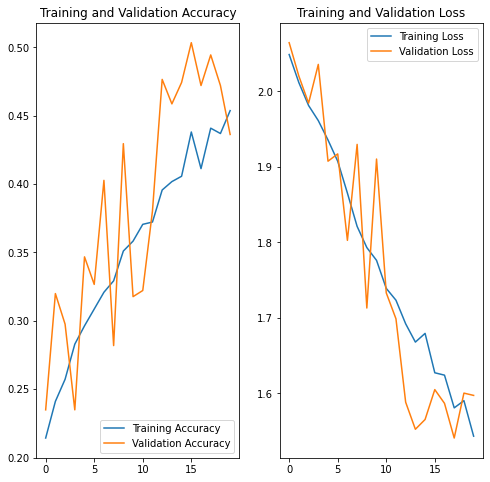

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The model has achieved around 40% accuracy on the training set and 45% accuracy on the validation set. Though the model is not overfitting but the performance of the model is very less.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
## Your code goes here.
df = pd.DataFrame(columns=['Class_name','Count'])
for i in range(len(class_names)):
    re = class_names[i] + "/*.jpg"
    list1 = list(data_dir_train.glob(re))
    df = df.append({'Class_name': class_names[i], 'Count': len(list1)}, ignore_index=True)
df = df.sort_values(by=['Count'], ascending=False)
print(df)

                   Class_name Count
5  pigmented benign keratosis   462
3                    melanoma   438
1        basal cell carcinoma   376
4                       nevus   357
7     squamous cell carcinoma   181
8             vascular lesion   139
0           actinic keratosis   114
2              dermatofibroma    95
6        seborrheic keratosis    77


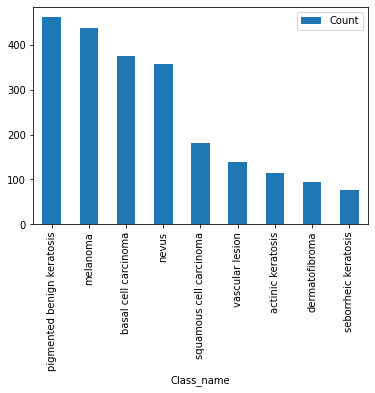

In [25]:
df.plot.bar(x='Class_name', y='Count', rot=90)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
Ans - seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
Ans - pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset = data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD8E0F35F90>: 100%|██████████| 500/500 [00:21<00:00, 22.86 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD8DBD19290>: 100%|██████████| 500/500 [00:21<00:00, 23.07 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD8DBD58250>: 100%|██████████| 500/500 [00:22<00:00, 22.47 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x7FD8E192B110>: 100%|██████████| 500/500 [01:39<00:00,  5.02 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FD8E192BBD0>: 100%|██████████| 500/500 [01:31<00:00,  5.45 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD8DBDABC10>: 100%|██████████| 500/500 [00:22<00:00, 22.61 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD8E0F35D10>: 100%|██████████| 500/500 [00:49<00:00, 10.17 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD8DBDAAE50>:   0%|          | 1/500 [00:00<00:59,  8.37 Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD8DBD19DD0>: 100%|██████████| 500/500 [00:23<00:00, 21.72 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD9897042D0>: 100%|██████████| 500/500 [00:23<00:00, 21.38 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0032014.jpg_59acb393-dec4-4cc4-a4e8-607c9844ded1.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0029541.jpg_69c6a9df-83f1-4817-a970-67d246bf4453.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026992.jpg_fba1337b-289f-4e40-bc88-aafc9e4019ea.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026203.jpg_f6e5b677-7255-421b-9de5-d615c7de693d.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC 

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [32]:
dataframe_dict_original = dict(zip(path_list, lesion_list_new))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/Colab Notebooks/Skin ...,squamous cell carcinoma
1,/content/gdrive/My Drive/Colab Notebooks/Skin ...,squamous cell carcinoma
2,/content/gdrive/My Drive/Colab Notebooks/Skin ...,squamous cell carcinoma
3,/content/gdrive/My Drive/Colab Notebooks/Skin ...,squamous cell carcinoma
4,/content/gdrive/My Drive/Colab Notebooks/Skin ...,squamous cell carcinoma
...,...,...
4495,/content/gdrive/My Drive/Colab Notebooks/Skin ...,melanoma
4496,/content/gdrive/My Drive/Colab Notebooks/Skin ...,melanoma
4497,/content/gdrive/My Drive/Colab Notebooks/Skin ...,melanoma
4498,/content/gdrive/My Drive/Colab Notebooks/Skin ...,melanoma


In [33]:
original_df['Label'].value_counts()

basal cell carcinoma          500
squamous cell carcinoma       500
pigmented benign keratosis    500
vascular lesion               500
seborrheic keratosis          500
melanoma                      500
dermatofibroma                500
nevus                         500
actinic keratosis             500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
data_dir_train="/content/gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [39]:
## your code goes here
model = Sequential()

model.add(Rescaling(scale=1./255, offset=0.0, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(len(class_names)))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [40]:
## your code goes here
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='sgd',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
activation_4 (Activation)    (None, 180, 180, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 90, 90, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 90, 90, 16)        64        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 90, 90, 32)       

#### **Todo:**  Train your model

In [41]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    epochs=epochs,
    shuffle=True
)

Epoch 1/30
169/169 [==============================] - 45s 255ms/step - loss: 2.3840 - accuracy: 0.2891 - val_loss: 2.1708 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 44s 251ms/step - loss: 1.5154 - accuracy: 0.4329 - val_loss: 2.0416 - val_accuracy: 0.2316
Epoch 3/30
169/169 [==============================] - 44s 252ms/step - loss: 1.3842 - accuracy: 0.4772 - val_loss: 2.1749 - val_accuracy: 0.2376
Epoch 4/30
169/169 [==============================] - 44s 253ms/step - loss: 1.2978 - accuracy: 0.5137 - val_loss: 1.4494 - val_accuracy: 0.4581
Epoch 5/30
169/169 [==============================] - 44s 257ms/step - loss: 1.1867 - accuracy: 0.5517 - val_loss: 1.4710 - val_accuracy: 0.4336
Epoch 6/30
169/169 [==============================] - 44s 252ms/step - loss: 1.0857 - accuracy: 0.5896 - val_loss: 2.2199 - val_accuracy: 0.3504
Epoch 7/30
169/169 [==============================] - 45s 260ms/step - loss: 0.9934 - accuracy: 0.6285 - val_loss: 1.2217 - val_ac

#### **Todo:**  Visualize the model results

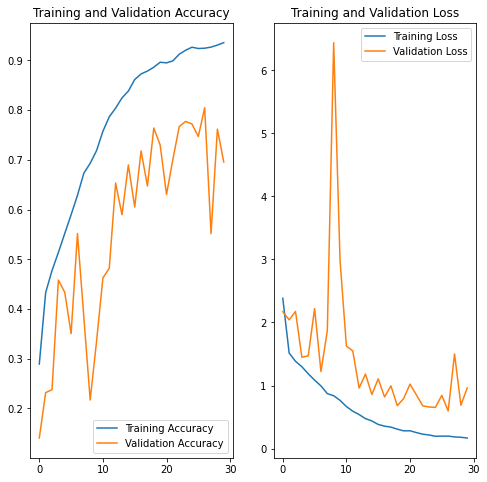

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The model has achieved around 93% accuracy on the training set and 70% accuracy on the validation set. Class rebalance has helped the model which is not overfitting and the performance of the model is better than the prevoius models. Though the model performance can be improved more.